In [53]:
#K-means & H clustering
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.stats import zscore
from scipy.cluster.hierarchy import dendrogram, linkage
df=pd.read_csv(r"C:\Users\linag\Downloads\CC GENERAL.csv", sep=',')
print(df.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [54]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [55]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)
df.drop('CUST_ID' ,axis=1, inplace=True)
df.isnull().sum().sum()

0

In [56]:
def cluster (n):
    model=AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='complete')
    clust_labels=model.fit_predict(df)
    r=pd.DataFrame(clust_labels)
    return r
agglomerative=cluster(3)
agglomerative

C:\Users\linag\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0
0     0
1     0
2     0
3     0
4     0
...  ..
8945  0
8946  0
8947  0
8948  0
8949  0

[8950 rows x 1 columns]

In [57]:
agglomerative1=cluster(4)
agglomerative1

C:\Users\linag\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0
0     2
1     2
2     2
3     2
4     2
...  ..
8945  2
8946  2
8947  2
8948  2
8949  2

[8950 rows x 1 columns]

In [58]:
agglomerative2= cluster(5)
agglomerative2

C:\Users\linag\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0
0     0
1     0
2     0
3     0
4     0
...  ..
8945  0
8946  0
8947  0
8948  0
8949  0

[8950 rows x 1 columns]

In [59]:
df['agglomerative']=agglomerative[0]
df['agglomerative1']=agglomerative1[0]
df['agglomerative2']=agglomerative2[0]

C:\Users\linag\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


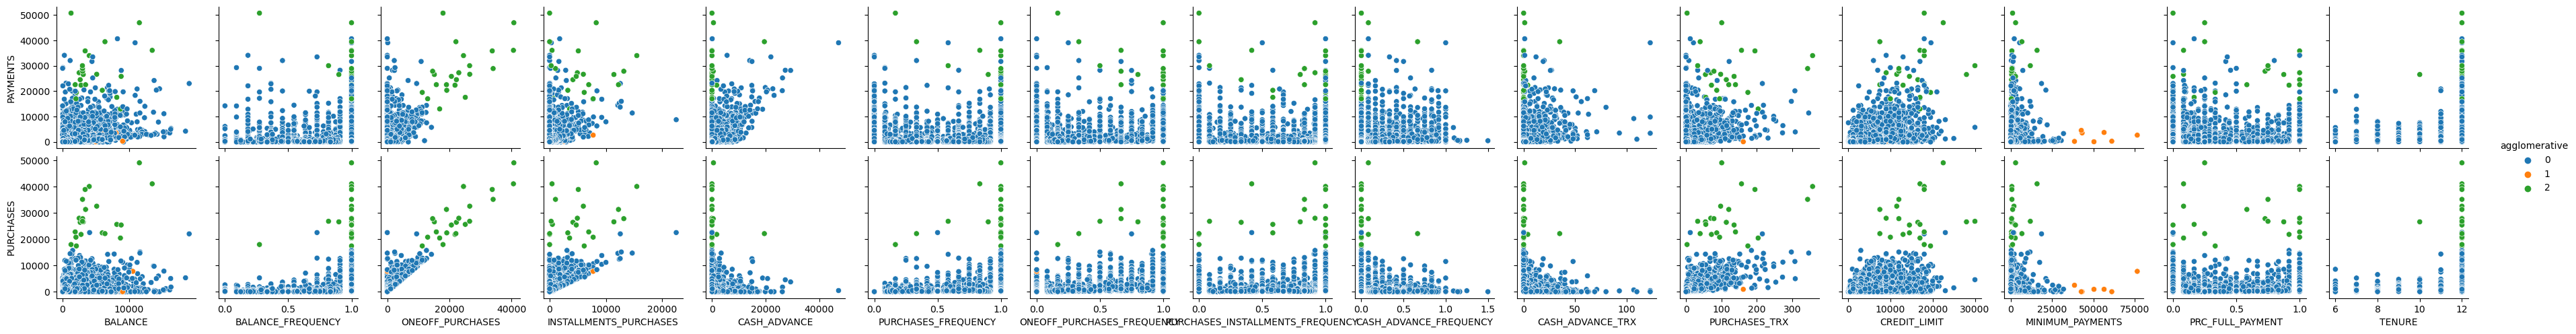

In [60]:
df1=df.copy()
df1 =df1.drop(['PAYMENTS','PURCHASES','agglomerative','agglomerative1','agglomerative2'],axis=1)
best_cols=df1.columns

def fait_voir (a):
    sns.pairplot(data=df, x_vars=df[best_cols], y_vars=['PAYMENTS','PURCHASES'], palette="tab10", hue=a)

fait_voir('agglomerative')

C:\Users\linag\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


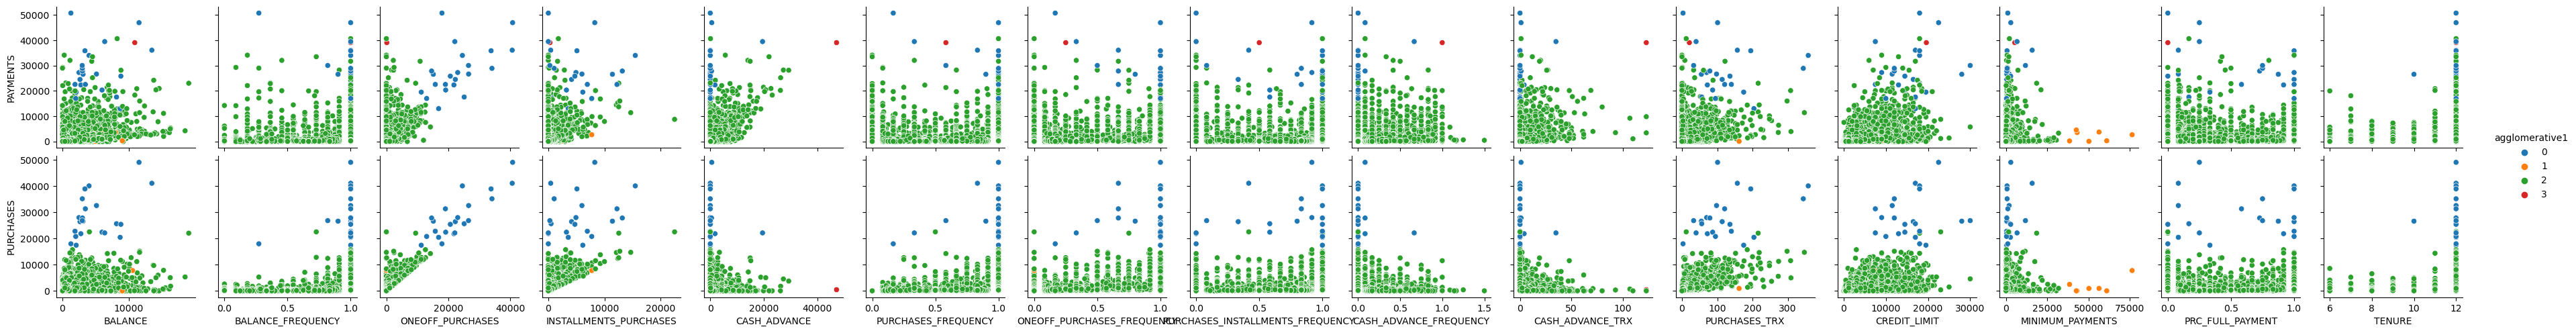

In [61]:
fait_voir('agglomerative1')

C:\Users\linag\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


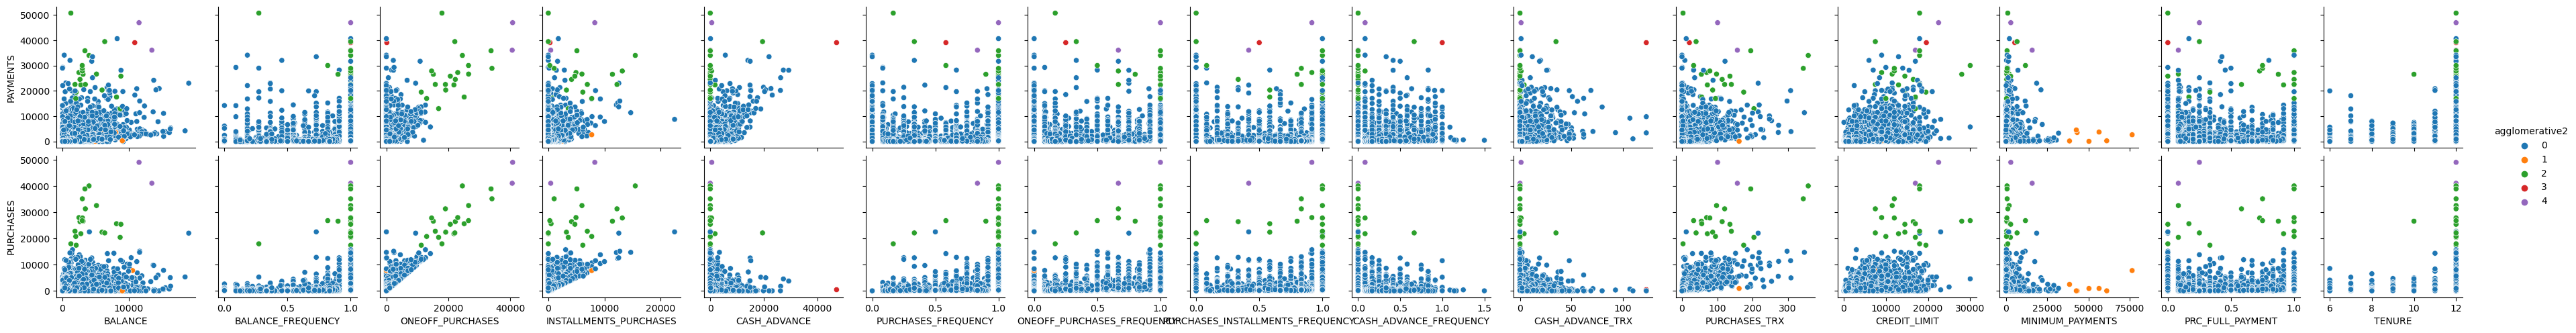

In [62]:
fait_voir('agglomerative2')

In [63]:
data_scaled=(df.drop(['agglomerative','agglomerative1','agglomerative2'],axis=1)).apply(zscore)
data_scaled.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2                    2.673451                         -0.916995   
3                   -0.399319                         -0.916995   
4                   -0.399319                         -0.916995   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.675349         -0.476070      -0.511333     -0.960433   
1                0.573963          0.110074      -0.591796      0.688639   
2               -0.675349         -0.476070      -0.109020      0.826062   
3               -0.258913         -0.329534      -0.551565      0.826062   
4               -0.675349         -0.476070      -0.551565     -0.905464   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   TENURE  
0 -0.528979     -3.109675e-01         -0.525551  0.36068  
1  0.818642      8.931021e-02          0.234227  0.36068  
2 -0.383805     -1.016632e-01         -0.525551  0.36068  
3 -0.598688      4.878305e-17         -0.525551  0.36068  
4 -0.364368     -2.657913e-01         -0.525551  0.36068

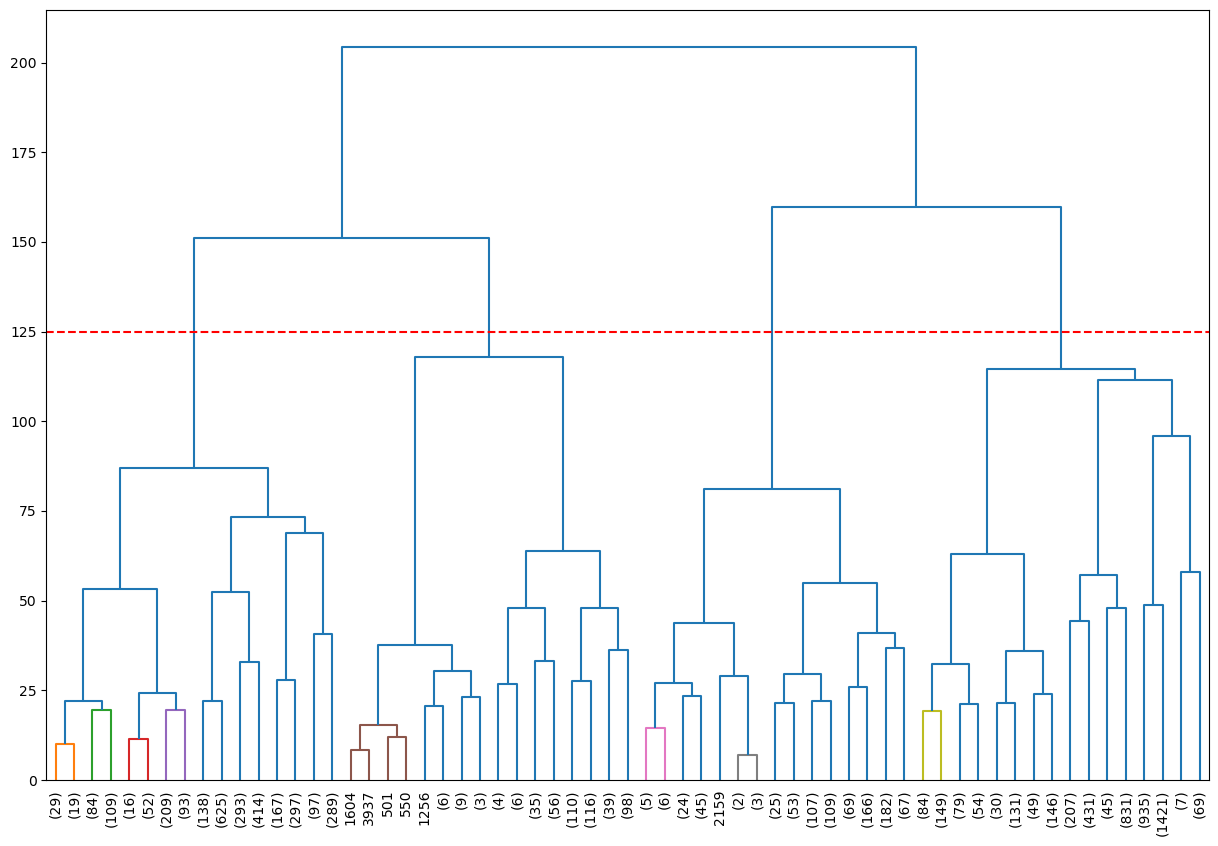

In [64]:
plt.figure(figsize=(15,10))
dendrogram(linkage(data_scaled,method="ward"),leaf_rotation=90,p=5,color_threshold=20,leaf_font_size=10,truncate_mode='level')
plt.axhline(y=125, color='r', linestyle='--')
plt.show()

In [65]:
Sum_of_squared_distances=[]
K= range(1,10)
for k in K:
    km=KMeans(n_clusters=k)
    km=km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)

C:\Users\linag\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\linag\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\linag\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\linag\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

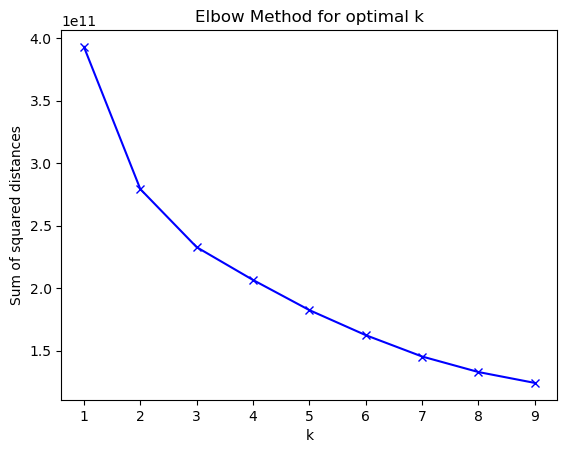

In [66]:
plt.plot(K,Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for optimal k')
plt.show()

In [67]:
kmeans=KMeans(n_clusters=3, random_state=0) 
kmeans.fit(df.drop(['agglomerative','agglomerative1','agglomerative2'],axis=1))

C:\Users\linag\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

In [68]:
labels=pd.DataFrame(kmeans.labels_)
labels

0
0     1
1     0
2     0
3     0
4     1
...  ..
8945  1
8946  1
8947  1
8948  1
8949  1

[8950 rows x 1 columns]

In [69]:
kmeans1=KMeans(n_clusters=4, random_state=0) 
kmeans1.fit(df.drop(['agglomerative','agglomerative1','agglomerative2'],axis=1))

C:\Users\linag\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

In [70]:
labels1=pd.DataFrame(kmeans1.labels_)
labels1

0
0     3
1     2
2     1
3     1
4     3
...  ..
8945  3
8946  3
8947  3
8948  3
8949  3

[8950 rows x 1 columns]

C:\Users\linag\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


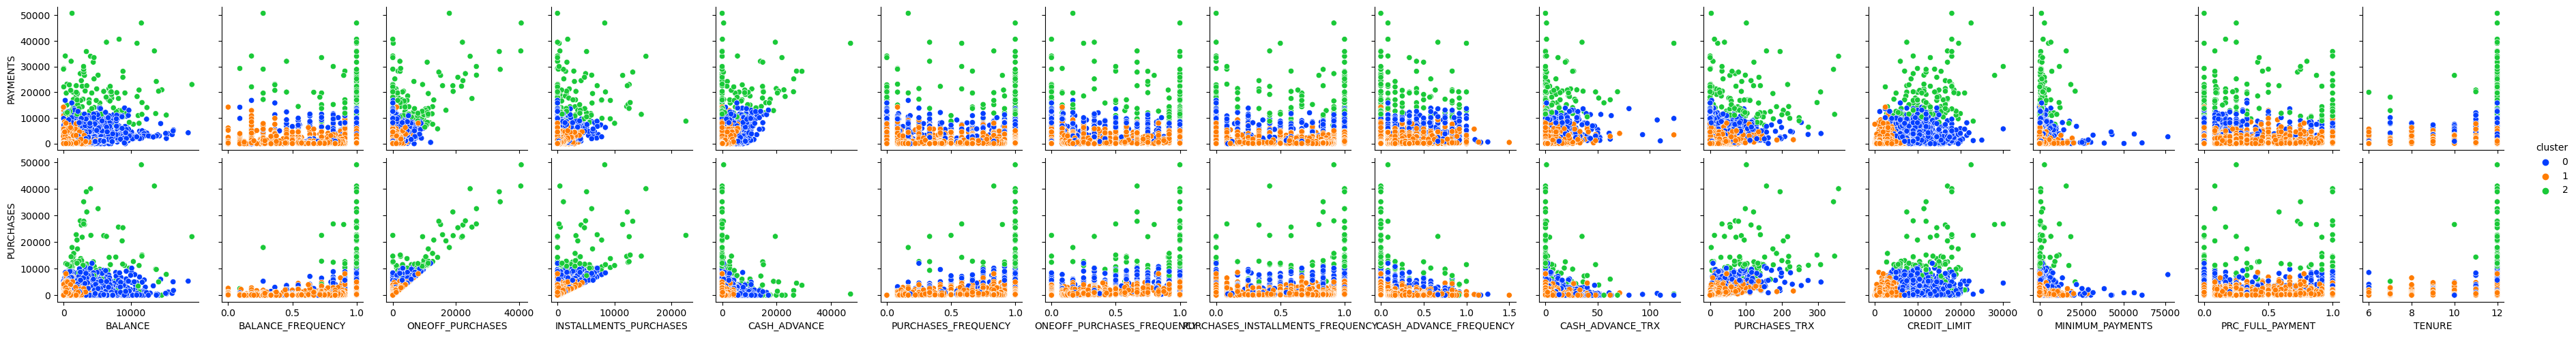

In [71]:
df['cluster']=labels[0]
df1 = df.drop(['PAYMENTS','PURCHASES','agglomerative','agglomerative1','agglomerative2','cluster'],axis=1)

best_cols=df1.columns

sns.pairplot(data=df,
                  x_vars=df[best_cols],
                  y_vars=['PAYMENTS','PURCHASES'],palette="bright", hue="cluster")

C:\Users\linag\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


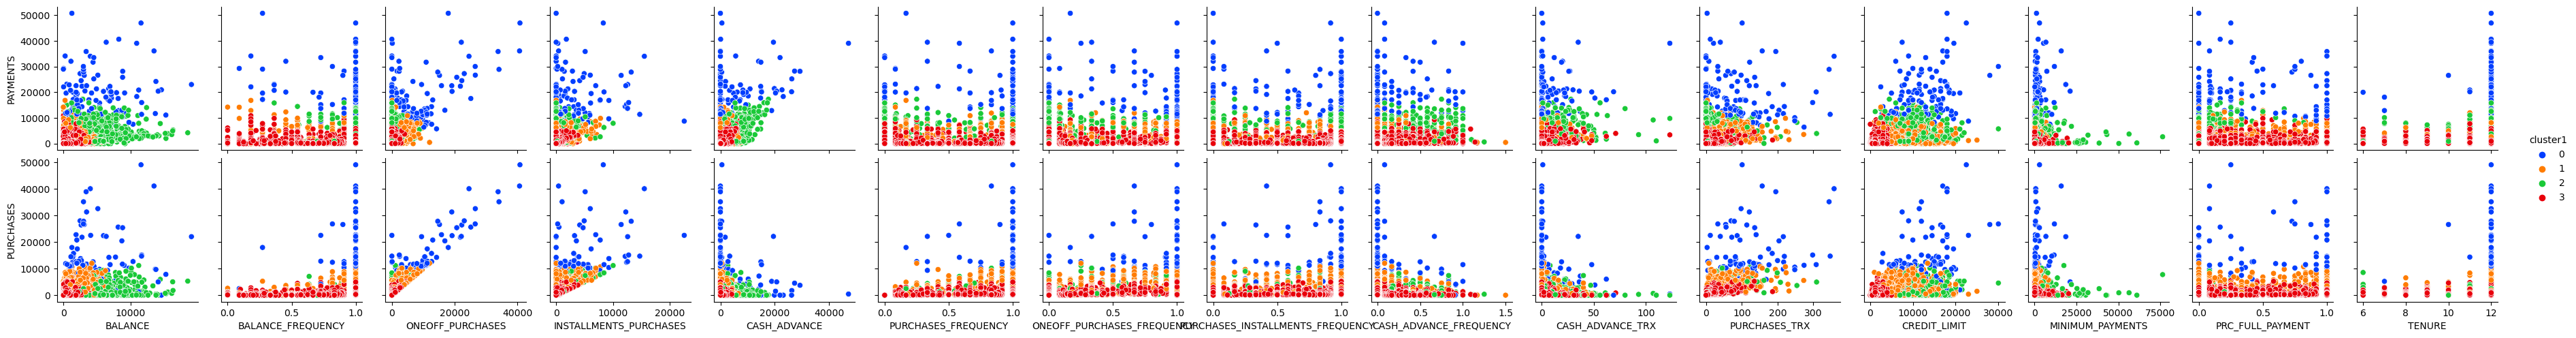

In [72]:
df['cluster1']=labels1[0]
df1 = df.drop(['PAYMENTS','PURCHASES','agglomerative','agglomerative1','agglomerative2','cluster','cluster1'],axis=1)

best_cols=df1.columns

sns.pairplot(data=df,
                  x_vars=df[best_cols],
                  y_vars=['PAYMENTS','PURCHASES'],palette="bright", hue="cluster1")

C:\Users\linag\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\linag\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


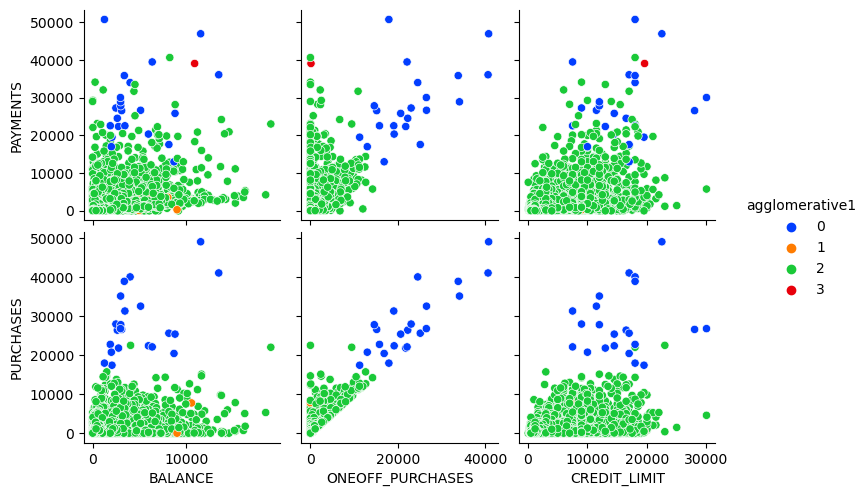

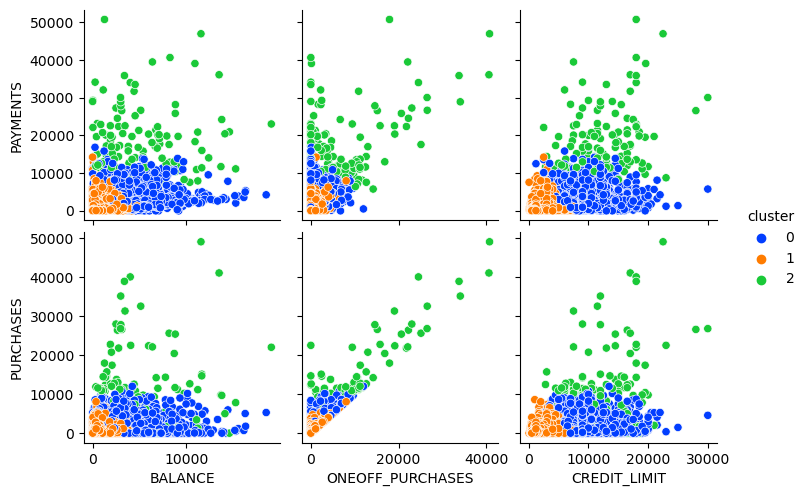

In [73]:
sns.pairplot(data=df,
                  x_vars=["BALANCE","ONEOFF_PURCHASES","CREDIT_LIMIT"],
                  y_vars=['PAYMENTS','PURCHASES'],palette="bright", hue="agglomerative1")

sns.pairplot(data=df,
                  x_vars=["BALANCE","ONEOFF_PURCHASES","CREDIT_LIMIT"],
                  y_vars=['PAYMENTS','PURCHASES'],palette="bright", hue="cluster")